# Preprocessing the data

>> importing libraries

In [1]:
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSC40038 Data/ORG01-01082021-31072022.csv') #reading the csv file

In [3]:
df.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
0,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B953419,A1021430,1,True,0.0,24077,Attending,Attendee,Standard,05/03/2021,219,Winter,280,40
1,Queer Homemaking I,22/10/2021,Reading Group,B954541,A1022562,1,True,0.0,24071,Attending,Attendee,Standard,08/03/2021,219,Autumn,228,32.57142857
2,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B956238,A1024268,1,True,0.0,24077,Attending,Attendee,Standard,10/03/2021,219,Winter,275,39.28571429
3,Queer Homemaking I,22/10/2021,Reading Group,B959604,A1027663,1,True,0.0,24071,Attending,Attendee,Standard,16/03/2021,219,Autumn,220,31.42857143
4,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B959608,A1027667,1,True,0.0,24077,Attending,Attendee,Standard,16/03/2021,219,Winter,269,38.42857143


In [4]:
df.nunique()

EventName             1350
StartDate              224
EventType               12
BookingReference     83230
AttendeeReference    83234
GroupSize                3
IsLeadAttendee           2
AttendeeGrossCost       60
EventId               1413
BookingStatus            2
AttendeeType            94
TicketType             124
StatusCreatedDate      418
ClientId                 1
Season                   4
days_to_event          234
weeks                  234
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83235 entries, 0 to 83234
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventName          83235 non-null  object 
 1   StartDate          83235 non-null  object 
 2   EventType          81613 non-null  object 
 3   BookingReference   83235 non-null  object 
 4   AttendeeReference  83235 non-null  object 
 5   GroupSize          83235 non-null  int64  
 6   IsLeadAttendee     83235 non-null  bool   
 7   AttendeeGrossCost  83235 non-null  float64
 8   EventId            83235 non-null  int64  
 9   BookingStatus      83235 non-null  object 
 10  AttendeeType       83235 non-null  object 
 11  TicketType         83235 non-null  object 
 12  StatusCreatedDate  83235 non-null  object 
 13  ClientId           83235 non-null  int64  
 14  Season             83235 non-null  object 
 15  days_to_event      83235 non-null  object 
 16  weeks              832

In [6]:
df.isnull().sum()

EventName               0
StartDate               0
EventType            1622
BookingReference        0
AttendeeReference       0
GroupSize               0
IsLeadAttendee          0
AttendeeGrossCost       0
EventId                 0
BookingStatus           0
AttendeeType            0
TicketType              0
StatusCreatedDate       0
ClientId                0
Season                  0
days_to_event           0
weeks                   0
dtype: int64

In [7]:
# df.duplicated().sum()
df[df.duplicated(keep=False)]

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
36992,LIPS: Medieval Philosophical and Scientific Ma...,15/06/2022,Summer School,B1042204,A1110972,1,True,75.0,25349,Attending,Student,Student,28/12/2021,219,Summer,169,24.14285714
36993,LIPS: Medieval Philosophical and Scientific Ma...,15/06/2022,Summer School,B1042204,A1110972,1,True,75.0,25349,Attending,Student,Student,28/12/2021,219,Summer,169,24.14285714


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
unique_cols= ['BookingStatus','IsLeadAttendee', 'GroupSize','EventType' ]

In [11]:
df.groupby(['EventType','EventType']).sum()

,,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,ClientId
EventType,EventType,,,,,
Colloquium,Colloquium,923,923,195.0,23850650,202137
Conference / Symposium,Conference / Symposium,5598,5596,12393.0,141815332,1225743
Exhibition,Exhibition,25,25,0.0,659925,5475
Lecture,Lecture,7136,7130,745.0,180854113,1561908
Lunchtime Lecture,Lunchtime Lecture,204,204,0.0,5251323,44676
Other Events,Other Events,5819,5819,940.0,147811093,1274361
Reading Group,Reading Group,128,128,0.0,3193930,28032
Research Training,Research Training,9748,9791,17055.0,247249233,2144448
Seminar,Seminar,48708,48709,170.0,1234702500,10667271


In [12]:
df['EventType']

0              Seminar
1        Reading Group
2              Seminar
3        Reading Group
4              Seminar
             ...      
83230     Other Events
83231          Seminar
83232          Lecture
83233          Seminar
83234          Seminar
Name: EventType, Length: 83234, dtype: object

In [13]:
df2 =df.copy()

In [14]:
df2.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
0,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B953419,A1021430,1,True,0.0,24077,Attending,Attendee,Standard,05/03/2021,219,Winter,280,40
1,Queer Homemaking I,22/10/2021,Reading Group,B954541,A1022562,1,True,0.0,24071,Attending,Attendee,Standard,08/03/2021,219,Autumn,228,32.57142857
2,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B956238,A1024268,1,True,0.0,24077,Attending,Attendee,Standard,10/03/2021,219,Winter,275,39.28571429
3,Queer Homemaking I,22/10/2021,Reading Group,B959604,A1027663,1,True,0.0,24071,Attending,Attendee,Standard,16/03/2021,219,Autumn,220,31.42857143
4,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B959608,A1027667,1,True,0.0,24077,Attending,Attendee,Standard,16/03/2021,219,Winter,269,38.42857143


In [15]:
df2.describe()

,GroupSize,AttendeeGrossCost,EventId,ClientId
count,83234.000000,83234.000000,83234.000000,83234.0
mean,0.998931,3.098103,25353.523236,219.0
std,0.035502,34.837689,538.110295,0.0
min,0.000000,0.000000,22520.000000,219.0
25%,1.000000,0.000000,24912.000000,219.0
50%,1.000000,0.000000,25330.000000,219.0
75%,1.000000,0.000000,25802.000000,219.0
max,2.000000,680.000000,26433.000000,219.0


In [16]:
for i in unique_cols:
  print(i, 'unique columns are' ,df2[i].unique())

BookingStatus unique columns are ['Attending' 'Cancelled']
IsLeadAttendee unique columns are [ True False]
GroupSize unique columns are [1 0 2]
EventType unique columns are ['Seminar' 'Reading Group' nan 'Conference / Symposium' 'Short Course'
 'Research Training' 'Lecture' 'Workshop' 'Other Events' 'Colloquium '
 'Lunchtime Lecture' 'Summer School' 'Exhibition']


In [17]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
for i in unique_cols:
  df2[i] = encode.fit_transform(df2[i])
df.head()

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
0,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B953419,A1021430,1,True,0.0,24077,Attending,Attendee,Standard,05/03/2021,219,Winter,280,40
1,Queer Homemaking I,22/10/2021,Reading Group,B954541,A1022562,1,True,0.0,24071,Attending,Attendee,Standard,08/03/2021,219,Autumn,228,32.57142857
2,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B956238,A1024268,1,True,0.0,24077,Attending,Attendee,Standard,10/03/2021,219,Winter,275,39.28571429
3,Queer Homemaking I,22/10/2021,Reading Group,B959604,A1027663,1,True,0.0,24071,Attending,Attendee,Standard,16/03/2021,219,Autumn,220,31.42857143
4,Neoliberalism. the Family. and Bourgeois Domes...,10/12/2021,Seminar,B959608,A1027667,1,True,0.0,24077,Attending,Attendee,Standard,16/03/2021,219,Winter,269,38.42857143


In [18]:
df2.describe()

,EventType,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,ClientId
count,83234.000000,83234.000000,83234.000000,83234.000000,83234.000000,83234.000000,83234.0
mean,6.847106,0.998931,0.999952,3.098103,25353.523236,0.001165,219.0
std,2.491335,0.035502,0.006932,34.837689,538.110295,0.034118,0.0
min,0.000000,0.000000,0.000000,0.000000,22520.000000,0.000000,219.0
25%,7.000000,1.000000,1.000000,0.000000,24912.000000,0.000000,219.0
50%,8.000000,1.000000,1.000000,0.000000,25330.000000,0.000000,219.0
75%,8.000000,1.000000,1.000000,0.000000,25802.000000,0.000000,219.0
max,12.000000,2.000000,1.000000,680.000000,26433.000000,1.000000,219.0


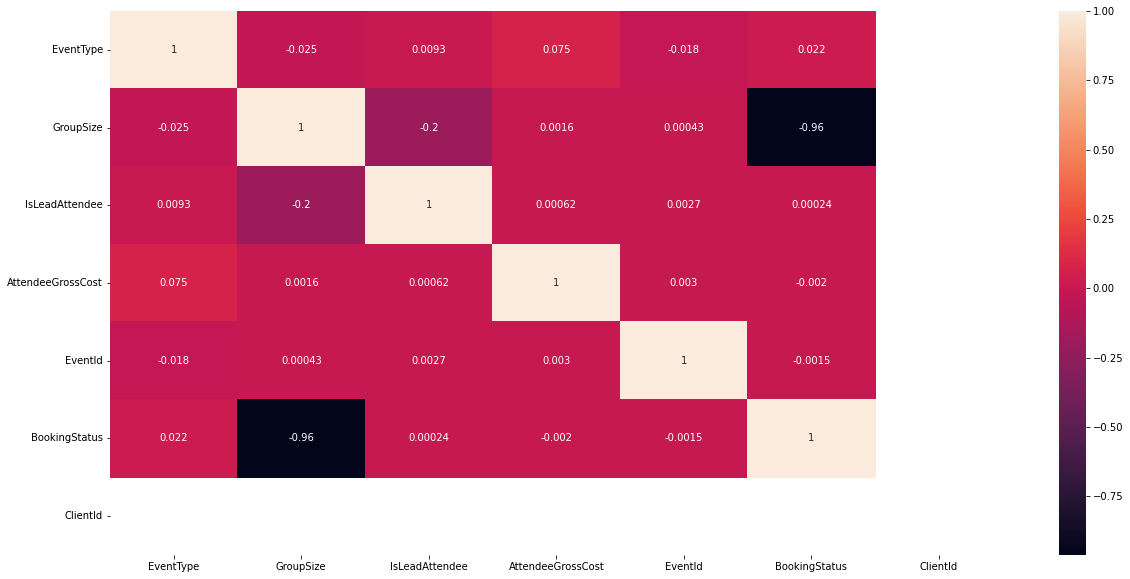

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot = True)

In [20]:
df2['StartDate'] = pd.to_datetime(df2['StartDate'], infer_datetime_format=True)

In [21]:
df2['StatusCreatedDate'] = pd.to_datetime(df2['StatusCreatedDate'], infer_datetime_format=True)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83234 entries, 0 to 83234
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EventName          83234 non-null  object        
 1   StartDate          83234 non-null  datetime64[ns]
 2   EventType          83234 non-null  int64         
 3   BookingReference   83234 non-null  object        
 4   AttendeeReference  83234 non-null  object        
 5   GroupSize          83234 non-null  int64         
 6   IsLeadAttendee     83234 non-null  int64         
 7   AttendeeGrossCost  83234 non-null  float64       
 8   EventId            83234 non-null  int64         
 9   BookingStatus      83234 non-null  int64         
 10  AttendeeType       83234 non-null  object        
 11  TicketType         83234 non-null  object        
 12  StatusCreatedDate  83234 non-null  datetime64[ns]
 13  ClientId           83234 non-null  int64         
 14  Season

In [23]:
import datetime as dt
df2.set_index('StartDate',inplace=True)

In [24]:
df2.head()

,EventName,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
StartDate,,,,,,,,,,,,,,,,
2021-10-12,Neoliberalism. the Family. and Bourgeois Domes...,8,B953419,A1021430,1,1,0.0,24077,0,Attendee,Standard,2021-05-03,219,Winter,280,40
2021-10-22,Queer Homemaking I,6,B954541,A1022562,1,1,0.0,24071,0,Attendee,Standard,2021-08-03,219,Autumn,228,32.57142857
2021-10-12,Neoliberalism. the Family. and Bourgeois Domes...,8,B956238,A1024268,1,1,0.0,24077,0,Attendee,Standard,2021-10-03,219,Winter,275,39.28571429
2021-10-22,Queer Homemaking I,6,B959604,A1027663,1,1,0.0,24071,0,Attendee,Standard,2021-03-16,219,Autumn,220,31.42857143
2021-10-12,Neoliberalism. the Family. and Bourgeois Domes...,8,B959608,A1027667,1,1,0.0,24077,0,Attendee,Standard,2021-03-16,219,Winter,269,38.42857143


In [25]:
# df['AttendeeType'].unique()

>>> Datetime and getting days to event

In [26]:
df3 = df2.copy().reset_index()
# df3['time_to_event'] = pd.DatetimeIndex(df['StartDate']) - pd.DatetimeIndex(df['StatusCreatedDate'])
# # df2['day']=
# df3.head()

In [27]:
# df['diff_days'] = (df['end_date'] - df['start_date']) / np.timedelta64(1, 'D')
# df3['days_to_event'] = df3['time_to_event']/ np.timedelta64(1, 'D')

In [28]:
df3.head(10)

,StartDate,EventName,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
0,2021-10-12,Neoliberalism. the Family. and Bourgeois Domes...,8,B953419,A1021430,1,1,0.0,24077,0,Attendee,Standard,2021-05-03,219,Winter,280,40
1,2021-10-22,Queer Homemaking I,6,B954541,A1022562,1,1,0.0,24071,0,Attendee,Standard,2021-08-03,219,Autumn,228,32.57142857
2,2021-10-12,Neoliberalism. the Family. and Bourgeois Domes...,8,B956238,A1024268,1,1,0.0,24077,0,Attendee,Standard,2021-10-03,219,Winter,275,39.28571429
3,2021-10-22,Queer Homemaking I,6,B959604,A1027663,1,1,0.0,24071,0,Attendee,Standard,2021-03-16,219,Autumn,220,31.42857143
4,2021-10-12,Neoliberalism. the Family. and Bourgeois Domes...,8,B959608,A1027667,1,1,0.0,24077,0,Attendee,Standard,2021-03-16,219,Winter,269,38.42857143
5,2021-10-12,Neoliberalism. the Family. and Bourgeois Domes...,8,B967598,A1035704,1,1,0.0,24077,0,Attendee,Standard,2021-12-04,219,Winter,242,34.57142857
6,2021-11-19,Queer Homemaking II,8,B972756,A1040883,1,1,0.0,24075,0,Attendee,Standard,2021-04-21,219,Autumn,212,30.28571429
7,2022-01-21,Neoliberalism. the Family. and Bourgeois Domes...,8,B972760,A1040887,1,1,0.0,24078,0,Attendee,Standard,2021-04-21,219,Winter,275,39.28571429
8,2021-03-09,Financial Technology - Challenges for the Law ...,12,B977104,A1045245,1,1,0.0,24371,0,Attendee,Standard,2021-02-05,219,Autumn,124,17.71428571
9,2021-03-09,Financial Technology - Challenges for the Law ...,12,B977116,A1045257,1,1,0.0,24371,0,Attendee,Standard,2021-02-05,219,Autumn,124,17.71428571


In [29]:
df4 = df3.sort_values(by='StartDate') 

In [30]:
df4.set_index('StartDate')

,EventName,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
StartDate,,,,,,,,,,,,,,,,
2021-01-10,Slavery. empire. industrialisation and war cap...,8,B1007150,A1075478,1,1,0.0,24964,0,Attendee,Standard,2021-09-28,219,Autumn,3,0.428571429
2021-01-10,Slavery. empire. industrialisation and war cap...,8,B1008383,A1076712,1,1,0.0,24964,0,Attendee,Standard,2021-09-30,219,Autumn,1,0.142857143
2021-01-10,Slavery. empire. industrialisation and war cap...,8,B1006813,A1075141,1,1,0.0,24964,0,Attendee,Standard,2021-09-28,219,Autumn,3,0.428571429
2021-01-10,Latin Palaeography,9,B1002092,A1070411,1,1,160.0,24579,0,External students / unwaged,External students / unwaged,2021-08-09,219,Autumn,23,3.285714286
2021-01-10,Blood on the River: The Berbice Slave Rebellion,8,B1008355,A1076684,1,1,0.0,24698,0,Attendee,Standard,2021-09-30,219,Autumn,1,0.142857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,Introduction to OSCOLA,7,B1098655,A1170865,0,1,0.0,26281,1,Attendee,Standard,2022-06-16,219,Summer,26,3.714285714
2022-12-07,Introduction to OSCOLA,7,B1105815,A1178216,1,1,0.0,26281,0,Attendee,Standard,2022-07-07,219,Summer,5,0.714285714
2022-12-07,Introduction to OSCOLA,7,B1098461,A1170666,0,1,0.0,26281,1,Attendee,Standard,2022-06-16,219,Summer,26,3.714285714


In [31]:
# import matplotlib.pyplot as plt
# %matplotlib inline  

# plt.figure(figsize=(20,10))

# from statsmodels.tsa.seasonal import seasonal_decompose
# # seasn = ['humidity', 'windspeed', 'demand']
# for i in unique_cols:

#   result = seasonal_decompose(df3[i], model='additive', period=1)
#   result.plot()
#   pyplot.show()

In [32]:
# import matplotlib.pyplot as plt
# def plot_df(df4, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.xticks(rotation=90)
#     plt.show()

# is_numeric = []

# for i in is_numeric.columns:
#     plot_df(df4, x=df4.index, y=df4[i], title=i)

# Sperate DF by event type


In [33]:
# Seminar
dfs0 = df4[df4['EventType'] == 0].reset_index()
dfs1 = df4[df4['EventType'] == 1].reset_index()
dfs2 = df4[df4['EventType'] == 2].reset_index()
dfs3 = df4[df4['EventType'] == 3].reset_index()
dfs4 = df4[df4['EventType'] == 4].reset_index()
dfs5 = df4[df4['EventType'] == 5].reset_index()
dfs6 = df4[df4['EventType'] == 6].reset_index()
dfs7 = df4[df4['EventType'] == 7].reset_index()
dfs8 = df4[df4['EventType'] == 8].reset_index()
dfs9 = df4[df4['EventType'] == 9].reset_index()
dfs10 = df4[df4['EventType'] == 10].reset_index()
dfs11 = df4[df4['EventType'] == 11].reset_index()
dfs12 = df4[df4['EventType'] == 12].reset_index()

In [34]:
dfs10.head()

,index,StartDate,EventName,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
0,44529,2022-06-06,LIPS: Introduction to Palaeography and Manuscr...,10,B1050406,A1119193,1,1,465.0,25335,0,Student,Student,2022-01-19,219,Summer,138,19.71428571
1,34037,2022-06-06,LIPS: Introduction to Palaeography and Manuscr...,10,B1038970,A1107731,0,1,0.0,25335,1,Student,Student,2021-07-12,219,Summer,181,25.85714286
2,74825,2022-06-06,LIPS: Introduction to the Codicology of Mediev...,10,B1089925,A1161991,1,1,95.0,25333,0,Student,Student,2022-05-18,219,Summer,19,2.714285714
3,64515,2022-06-06,LIPS: Insular Palaeography,10,B1075942,A1147703,1,1,95.0,25334,0,Student,Student,2022-06-04,219,Summer,61,8.714285714
4,37429,2022-06-06,LIPS: Bilingual Manuscripts in England c.950-1200,10,B1042689,A1111458,1,1,75.0,25336,0,Student,Student,2022-04-01,219,Summer,153,21.85714286


In [35]:
# for i in df4['EventType'].unique():
#   dfseminar = df4[df4['EventType'] == i]

In [36]:
df4['EventType'].unique()

array([ 8,  9,  7,  5,  3,  1, 12,  4, 11,  6,  0, 10,  2])

In [37]:
dfs0['weeks'] = dfs0.StartDate.dt.isocalendar().week
# dfs0['weeks'] =
dfs0.head()

,index,StartDate,EventName,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
0,30222,2021-11-26,69th National Postgraduate Colloquium in Germa...,0,B1034234,A1102920,1,1,0.0,25191,0,Attendee,Standard,2021-11-23,219,Autumn,3,47
1,21484,2021-11-26,69th National Postgraduate Colloquium in Germa...,0,B1023922,A1092283,1,1,0.0,25191,0,Attendee,Standard,2021-10-27,219,Autumn,30,47
2,27947,2021-11-26,69th National Postgraduate Colloquium in Germa...,0,B1031686,A1100285,1,1,0.0,25191,0,Attendee,Standard,2021-11-14,219,Autumn,12,47
3,25534,2021-11-26,69th National Postgraduate Colloquium in Germa...,0,B1028811,A1097312,1,1,0.0,25191,0,Attendee,Standard,2021-08-11,219,Autumn,18,47
4,21476,2021-11-26,69th National Postgraduate Colloquium in Germa...,0,B1023913,A1092274,1,1,0.0,25191,0,Attendee,Standard,2021-10-27,219,Autumn,30,47


In [38]:
# dfs0.iloc[708]
# dfs0.dropna(inplace=True)
dfs0.drop([708],axis=0, inplace=True)

In [39]:
dfs0['days_to_event'] = pd.to_numeric(dfs0["days_to_event"])
dfs0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 0 to 922
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              922 non-null    int64         
 1   StartDate          922 non-null    datetime64[ns]
 2   EventName          922 non-null    object        
 3   EventType          922 non-null    int64         
 4   BookingReference   922 non-null    object        
 5   AttendeeReference  922 non-null    object        
 6   GroupSize          922 non-null    int64         
 7   IsLeadAttendee     922 non-null    int64         
 8   AttendeeGrossCost  922 non-null    float64       
 9   EventId            922 non-null    int64         
 10  BookingStatus      922 non-null    int64         
 11  AttendeeType       922 non-null    object        
 12  TicketType         922 non-null    object        
 13  StatusCreatedDate  922 non-null    datetime64[ns]
 14  ClientId  

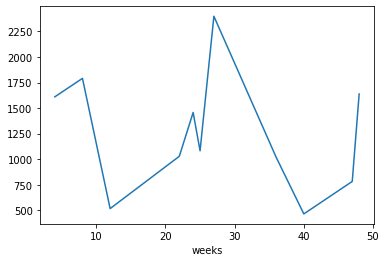

In [40]:
dfs0.groupby('weeks').sum()['days_to_event'].plot()

In [59]:
dfs0_sum = dfs0.groupby('weeks').sum()
dfs0_sum

,index,EventType,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,ClientId,days_to_event
weeks,,,,,,,,,
4,7197630,0,164,164,0.0,4187248,0,35916,1610
8,5757364,0,110,110,0.0,2837340,0,24090,1791
12,8351031,0,135,135,0.0,3504600,0,29565,516
22,2385830,0,34,34,0.0,876180,0,7446,1028
24,5611786,0,74,74,0.0,1928662,0,16206,1457
25,2807198,0,37,37,0.0,972545,0,8103,1082
27,9720169,0,130,130,0.0,3344900,0,28470,2399
36,3906435,0,52,52,195.0,1365884,0,11388,1019
40,1338697,0,20,20,0.0,520400,0,4380,464


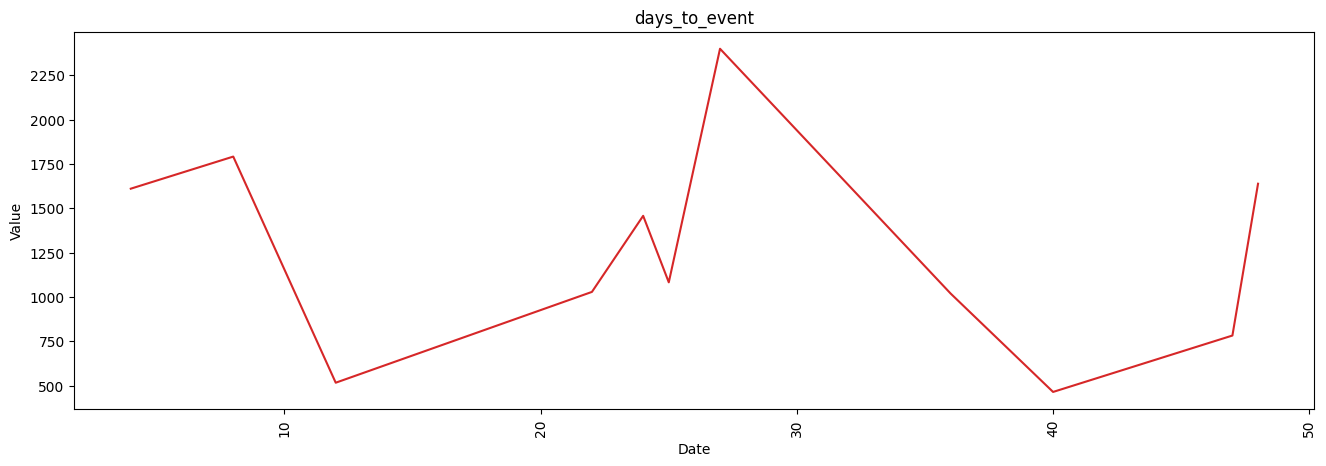

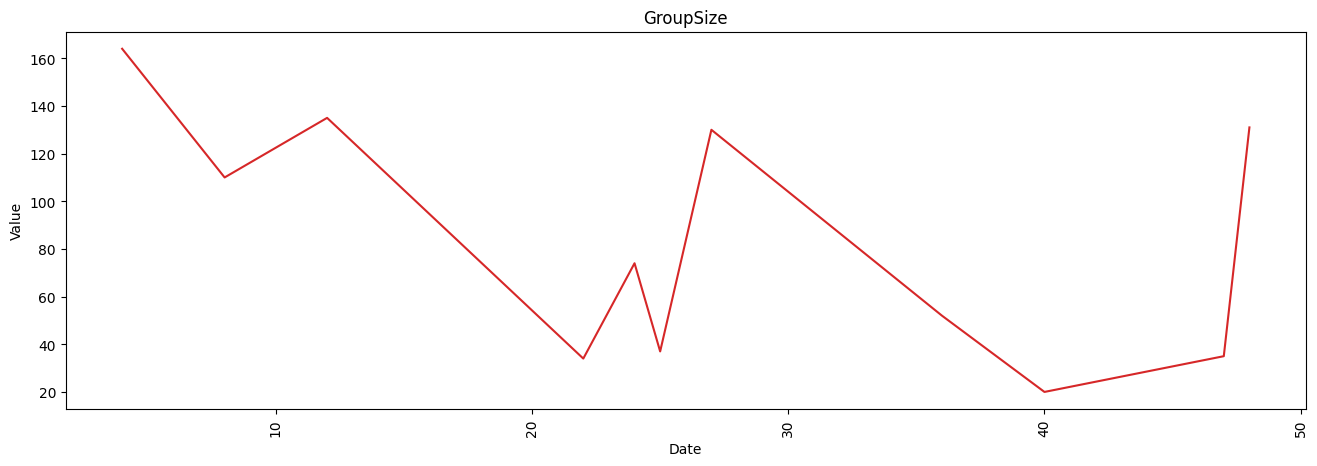

In [61]:
import matplotlib.pyplot as plt
def plot_df(dfs0_sum, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show()

is_numeric = ['days_to_event','GroupSize']

for i in is_numeric:
    plot_df(dfs0_sum, x=dfs0_sum.index, y=dfs0_sum[i], title=i)

In [41]:
# dfs0.groupby('Season').sum()

# for i in df4['EventType'].unique():
  

#   # dfseminar = df4[df4['EventType'] == i]

# Using Season for analysis

In [42]:
df4['Season'].unique()

array(['Autumn', 'Winter', 'Summer', 'Spring'], dtype=object)

In [43]:
df4.iloc[43]

StartDate            2021-01-10 00:00:00
EventName             Latin Palaeography
EventType                              9
BookingReference                B1010459
AttendeeReference               A1078790
GroupSize                              1
IsLeadAttendee                         1
AttendeeGrossCost                  175.0
EventId                            24579
BookingStatus                          0
AttendeeType                    Standard
TicketType                      Standard
StatusCreatedDate    2021-04-10 00:00:00
ClientId                             219
Season                            Autumn
days_to_event                      #NUM!
weeks                              #NUM!
Name: 8945, dtype: object

In [44]:
df4.replace('#NUM!', float('NaN'))
# df[df < 0] = float('NaN')


,StartDate,EventName,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
5847,2021-01-10,Slavery. empire. industrialisation and war cap...,8,B1007150,A1075478,1,1,0.0,24964,0,Attendee,Standard,2021-09-28,219,Autumn,3,0.428571429
6955,2021-01-10,Slavery. empire. industrialisation and war cap...,8,B1008383,A1076712,1,1,0.0,24964,0,Attendee,Standard,2021-09-30,219,Autumn,1,0.142857143
5563,2021-01-10,Slavery. empire. industrialisation and war cap...,8,B1006813,A1075141,1,1,0.0,24964,0,Attendee,Standard,2021-09-28,219,Autumn,3,0.428571429
2083,2021-01-10,Latin Palaeography,9,B1002092,A1070411,1,1,160.0,24579,0,External students / unwaged,External students / unwaged,2021-08-09,219,Autumn,23,3.285714286
6928,2021-01-10,Blood on the River: The Berbice Slave Rebellion,8,B1008355,A1076684,1,1,0.0,24698,0,Attendee,Standard,2021-09-30,219,Autumn,1,0.142857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80714,2022-12-07,Introduction to OSCOLA,7,B1098655,A1170865,0,1,0.0,26281,1,Attendee,Standard,2022-06-16,219,Summer,26,3.714285714
83136,2022-12-07,Introduction to OSCOLA,7,B1105815,A1178216,1,1,0.0,26281,0,Attendee,Standard,2022-07-07,219,Summer,5,0.714285714
80579,2022-12-07,Introduction to OSCOLA,7,B1098461,A1170666,0,1,0.0,26281,1,Attendee,Standard,2022-06-16,219,Summer,26,3.714285714
80507,2022-12-07,Introduction to OSCOLA,7,B1098269,A1170471,1,1,0.0,26281,0,Attendee,Standard,2022-06-15,219,Summer,27,3.857142857


In [45]:
# dfs0['days_to_event'] = pd.to_numeric(dfs0["days_to_event"])
# dfs0.info()

In [47]:
# df4['days_to_event'] = pd.to_numeric(df4["days_to_event"])
# df4.info()

In [48]:
dfSummer = df4[df4['Season'] == 'Summer']
dfAutumn = df4[df4['Season'] == 'Autumn']
dfSpring = df4[df4['Season'] == 'Spring']
dfWinter = df4[df4['Season'] == 'Winter']


# df4.tail()

In [49]:
dfSummer['weeks'] = dfs0.StartDate.dt.isocalendar().week
dfSummer.head()

<ipython-input-49-e20c25a0fa81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSummer['weeks'] = dfs0.StartDate.dt.isocalendar().week


,StartDate,EventName,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,AttendeeType,TicketType,StatusCreatedDate,ClientId,Season,days_to_event,weeks
558,2021-02-08,Test event (AT),12,B998840,A1067111,1,1,0.0,24563,0,Attendee,Standard,2021-07-30,219,Summer,3,25
513,2021-08-18,History Lab Annual Conference- Material Cultur...,1,B998727,A1066998,1,1,0.0,24549,0,Attendee,Standard,2021-07-28,219,Summer,21,24
808,2021-08-18,History Lab Annual Conference- Material Cultur...,1,B999407,A1067685,1,1,0.0,24549,0,Attendee,Standard,2021-11-08,219,Summer,7,48
620,2021-08-18,History Lab Annual Conference- Material Cultur...,1,B998952,A1067223,1,1,0.0,24549,0,Attendee,Standard,2021-02-08,219,Summer,16,27
618,2021-08-18,History Lab Annual Conference- Material Cultur...,1,B998948,A1067219,1,1,0.0,24549,0,Attendee,Standard,2021-02-08,219,Summer,16,27


In [50]:
df4.groupby('weeks').sum()

,EventType,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,ClientId
weeks,,,,,,,
#NUM!,425,93,90,3130.0,2277608,0,19929
0,59000,8285,8285,2440.0,210073097,0,1814415
0.142857143,41757,5925,5926,478.0,150231914,1,1297794
0.285714286,29949,4212,4213,945.0,106925474,1,922647
0.428571429,24982,3482,3485,1515.0,88642805,3,763215
...,...,...,...,...,...,...,...
9.285714286,1599,278,278,880.0,7049384,0,60882
9.428571429,1115,153,153,1016.5,3855832,0,33507
9.571428571,803,109,109,503.0,2761760,0,23871


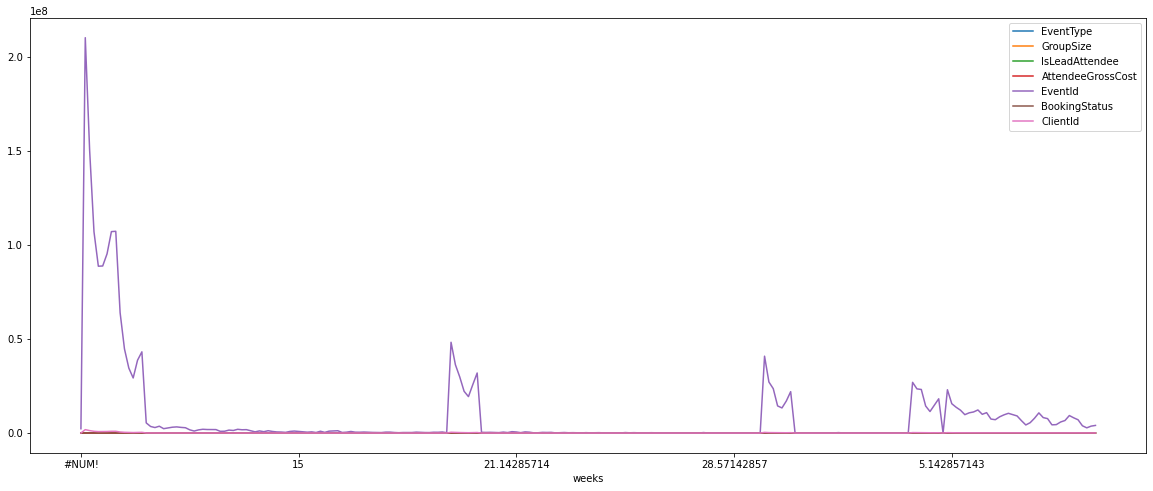

In [51]:
# plt.figure(figsize=(25,10))


# f, ax = plt.subplots(1, figsize=(10,8))

# plt.plot(x,s, color='k', LineWidth=.8)
df4.groupby('weeks').sum().plot(figsize=(20,8))
# x_vals = np.linspace(0,500,20)
# y_vals = [0] * len(x_vals)

# plt.scatter(x_vals,y_vals, marker='.',color='red')

In [52]:
# dfs0.resample('w').sum()

# smiths

In [55]:
# import time
# import pandas as pd
# from matplotlib import pyplot as plt


# #Limiting variables for results
# maxGraphs = 10

# #Change filter conditions for events
# def getFilter(event):
#     conditions = [
#         event.GroupSize.sum() < 10
#     ]
#     return all(conditions)

# startTime = time.time()
# print("Starting...")

# #Variables for storage
# graphCount = 0

# #Create the dataframe from CSV file
# # data = pd.DataFrame(data=pd.read_csv("CSC40038 Data\ORG01-01082021-31072022.csv"))
# data=df
# data['StatusCreatedDate'] = pd.to_datetime(data['StatusCreatedDate'])
# data = data.sort_values('StatusCreatedDate')
# #Making a list of events with event names
# events = data[['EventName', 'EventId']]
# events = events.groupby('EventId').first()

# #Data alterations (dropping/altering columns)
# data = data.drop(['EventType','BookingReference','AttendeeReference','IsLeadAttendee','AttendeeGrossCost','EventName'], axis=1)

# endTime = time.time()
# processingTime = endTime - startTime 
# print("Preprocessing Data Complete! Time Taken: " + str(processingTime) + " seconds.")

# def giveEventWeekly():
#     for eventId in events.index:
#         event = data[data.EventId == eventId]
#         #Decides if the event should be plotted or ignored
#         if not getFilter(event):
#             continue
#         #Resample the data into weekly groups
#         event = event.resample('W', on='StatusCreatedDate').sum(numeric_only=True)
#         #Graphs for weekly results
#         x, y, y2 = event.index, event.GroupSize, event.GroupSize.cumsum()
#         graph1Args = [x, y]
#         graph2Args = [x, y2]
#         giveGraphs(dataList={'Week Sales': graph1Args, 'Cumulative Sales': graph2Args}, \
#             title=events.at[eventId, 'EventName'])


# def giveGraphs(dataList = {}, title = '', markers = '.', lineStyle = ''):
#     global graphCount
#     if graphCount > maxGraphs:
#         return
#     for data in dataList:
#         plt.plot(dataList[data][0], dataList[data][1], label = data, marker=markers, ls=lineStyle)
#     plt.suptitle(title)
#     plt.legend()
#     plt.show()
#     graphCount += 1

# def giveTDeltaBookings():
#     diffList = []
#     bookingList= []
#     for eventId in events.index:
#         event = getEventData(eventId)
#         diffList, bookingList = giveEventTDBookings(event, diffList, bookingList)

#     #Produce a plot of the events bookings with respect to how long the event had bookings
#     giveGraphs(dataList={'Bookings': [diffList, bookingList]})


# def giveEventTDBookings(event, diffList, bookingList):

#     #Sets the datetime of the first booking and last booking
#     firstSaleDate = event.StatusCreatedDate.iloc[0]
#     lastSaleDate = event.StatusCreatedDate.iloc[-1]

#     #Finds the difference in datetime of the first and last booking
#     dateDiff = lastSaleDate - firstSaleDate

#     #Append to the list of data points for the event
#     diffList.append(dateDiff.days) 
#     bookingList.append(event.GroupSize.sum())

#     return diffList, bookingList

# # def getEventData(event):

# #     #Select event from event data
# #     eventData = data[data.EventId == event]

# #     return eventData

# # #giveTDeltaBookings()
# # giveEventWeekly()

Starting...
Preprocessing Data Complete! Time Taken: 0.05719637870788574 seconds.
